In [19]:
#Задачи: Линейная регрессия
# 1. Разработать модель линейной регрессии, учитывающей все (в примере),2,3 столбца входных переменных. Рассчитать MSE. 
# Вывести значения коэффициентов модели.
# 2. Разработать модель линейной регрессии, базисные функции - полином от исходных значений. Найти зависимость MSE от
# максимальной степени полинома. (max_pow <= 10)
# 3. Регуляризация. Гребневая регрессия. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha.
# 4. Регуляризация. Лассо. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# linear_model.Lasso(alpha=0.1)

In [20]:
#SVR
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
# Исследовать точность модели регрессии при применении  ядерных функций 'poly', 'sigmoid'
# Реализовать модель SVRб учитывающую все характеристики исходных данных, выбрать модель с оптимальными параметрами.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, maxabs_scale
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

# Загрузка и подготовка данных
df = pd.read_csv("Advertising (1).csv")
df.drop(columns=df.columns[0], inplace=True)  # Удаление ненужного столбца

X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("значение:", lr.intercept_)
print("коэффицент:", lr.coef_)
print("MSE:", mse)

значение: 2.8769666223179318
коэффицент: [0.04656457 0.17915812 0.00345046]
MSE: 1.9730456202283397


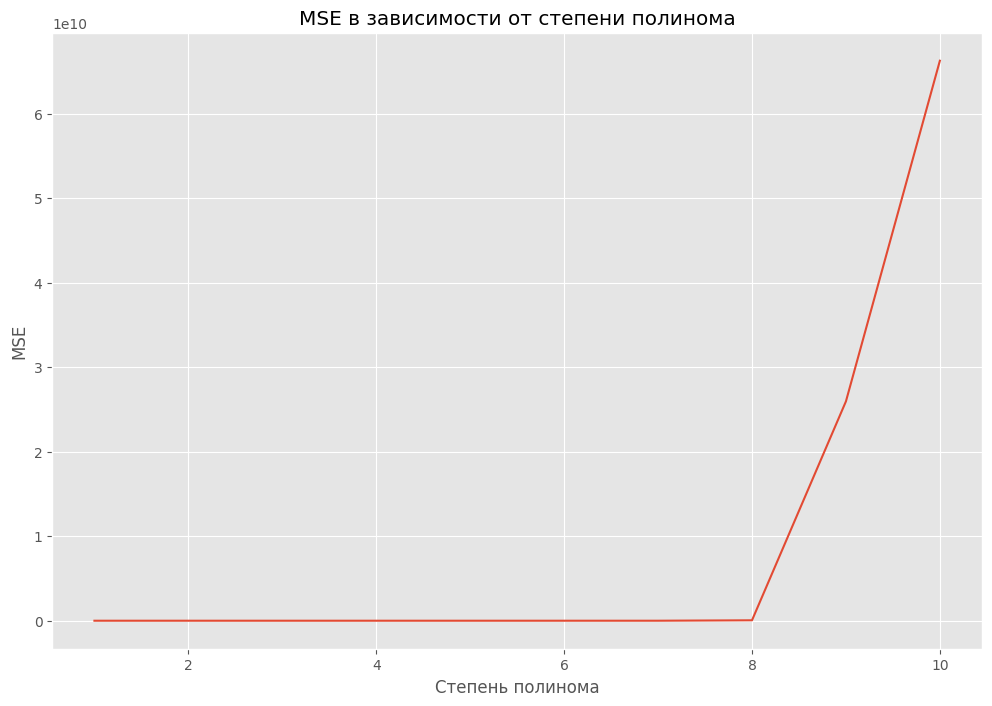

In [31]:
mse_list = []

for degree in range(1, 11):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=1)

    lr_poly = LinearRegression()
    lr_poly.fit(X_train, y_train)

    y_pred = lr_poly.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

plt.plot(range(1, 11), mse_list)
plt.title('MSE в зависимости от степени полинома')
plt.xlabel('Степень полинома')
plt.ylabel('MSE')
plt.show()

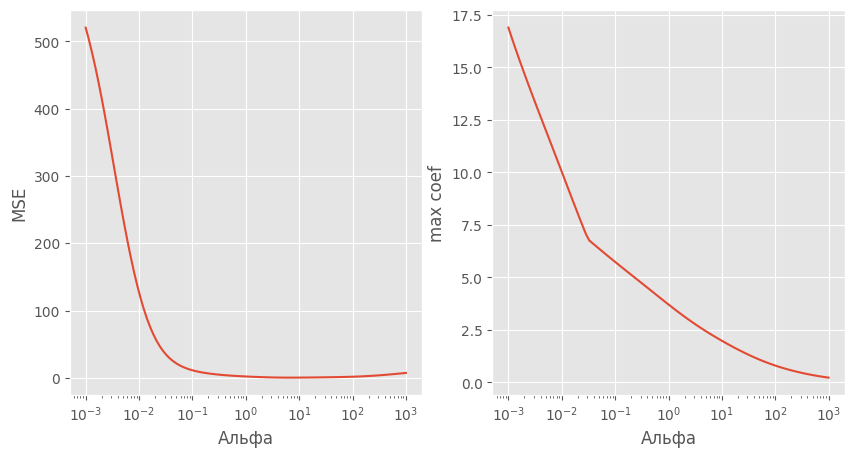

In [32]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha_values = np.logspace(-3, 3, 100)
mse_ridges = []
max_coef = []

for alpha in alpha_values:

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge.predict(X_test_scaled)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    mse_ridges.append(mse_ridge)
    max_coef.append(np.max(np.abs(ridge.coef_)))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alpha_values, mse_ridges)
plt.xscale('log')
plt.xlabel('Альфа')
plt.ylabel('MSE')
plt.subplot(1, 2, 2)
plt.plot(alpha_values, max_coef)
plt.xscale('log')
plt.xlabel('Альфа')
plt.ylabel('max coef')
plt.show()

C:\All Pro\Programs\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.756e+00, tolerance: 4.221e-01
  model = cd_fast.enet_coordinate_descent(
C:\All Pro\Programs\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.762e+00, tolerance: 4.221e-01
  model = cd_fast.enet_coordinate_descent(
C:\All Pro\Programs\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.769e+00, to

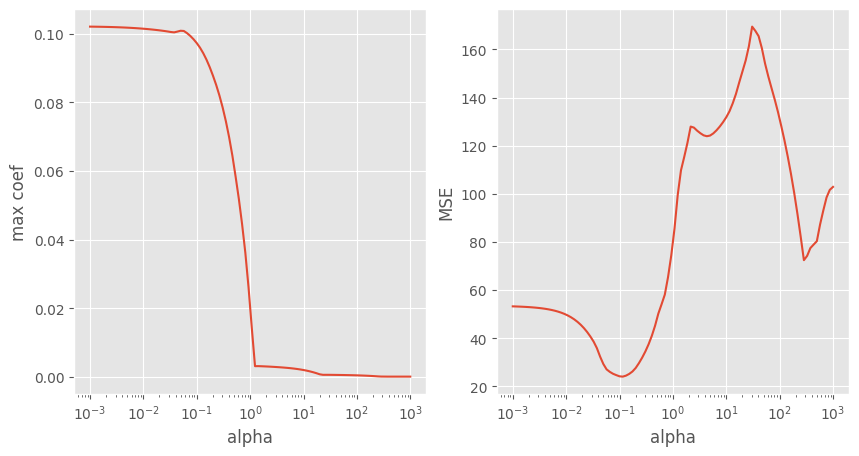

In [33]:
max_coef_lasso = []
mse_lasso = []

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha, max_iter=15000)
    lasso.fit(X_train, y_train)

    y_pred = lasso.predict(X_test)

    max_coef = np.max(np.abs(lasso.coef_))
    max_coef_lasso.append(max_coef)

    mse = mean_squared_error(y_test, y_pred)
    mse_lasso.append(mse)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alpha_values, max_coef_lasso)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('max coef')
plt.subplot(1, 2, 2)
plt.plot(alpha_values, mse_lasso)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

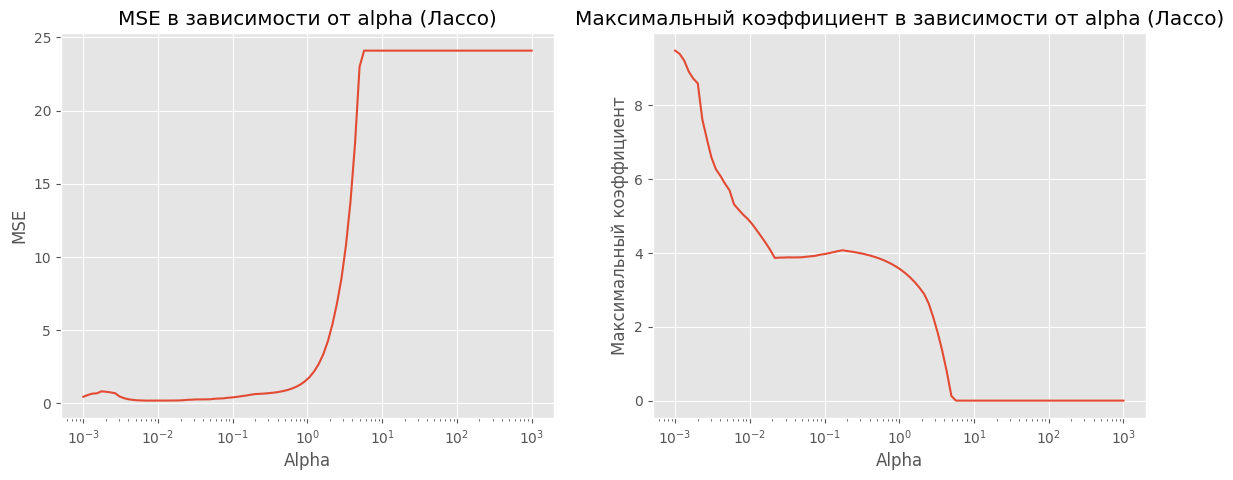

In [34]:
# Нормализация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Исследуем зависимость MSE от alpha
mse_lasso_values = []
max_coef_lasso_values = []

alpha_values = np.logspace(-3, 3, 100)
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha, max_iter=20000)  # Увеличиваем количество итераций
    lasso.fit(X_train_scaled, y_train)

    y_pred_lasso = lasso.predict(X_test_scaled)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)

    mse_lasso_values.append(mse_lasso)
    max_coef_lasso_values.append(np.max(np.abs(lasso.coef_)))

# Визуализируем зависимости
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(alpha_values, mse_lasso_values)
plt.title('MSE в зависимости от alpha (Лассо)')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(alpha_values, max_coef_lasso_values)
plt.title('Максимальный коэффициент в зависимости от alpha (Лассо)')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Максимальный коэффициент')

plt.show()

In [35]:
svr_poly = SVR(kernel='poly', C=100, degree=1)
svr_poly.fit(X_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid', C=100, degree=1)
svr_sigmoid.fit(X_train, y_train)

y_pred_poly = svr_poly.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)

y_pred_sigmoid = svr_sigmoid.predict(X_test)
mse_sigmoid = mean_squared_error(y_test, y_pred_sigmoid)

print('MSE SVR(poly):', mse_poly)
print('MSE SVR(sigmoid):', mse_sigmoid)

MSE SVR(poly): 19.804253385210654
MSE SVR(sigmoid): 148239.23621962464
